In [2]:
import pandas as pd 
import yfinance as yf

In [3]:
data = yf.download("^SPX",
                   start="2000-01-01", end="2025-01-01")
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High          Low  \
Ticker                            ^SPX         ^SPX         ^SPX         ^SPX   
Date                                                                            
2000-01-03 00:00:00+00:00  1455.219971  1455.219971  1478.000000  1438.359985   
2000-01-04 00:00:00+00:00  1399.420044  1399.420044  1455.219971  1397.430054   
2000-01-05 00:00:00+00:00  1402.109985  1402.109985  1413.270020  1377.680054   
2000-01-06 00:00:00+00:00  1403.449951  1403.449951  1411.900024  1392.099976   
2000-01-07 00:00:00+00:00  1441.469971  1441.469971  1441.469971  1400.729980   

Price                             Open      Volume  
Ticker                            ^SPX        ^SPX  
Date                                                
2000-01-03 00:00:00+00:00  1469.250000   931800000  
2000-01-04 00:00:00+00:00  1455.219971  1009000000  
2000-01-05 00:00:00+00:00  1399.420044  1085500000  
2000-01-06 00:00:00+00:00  1402.1

In [10]:
data.to_csv(r'/Users/YJDah/Desktop/Financial Markets & Big Data/SP500.csv')
print("Data sucessfully exported to CSV")

Data sucessfully exported to CSV


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew, kurtosis
import yfinance as yf 


In [12]:
data = yf.download("^SPX",
                   start="2000-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [13]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^SPX,^SPX,^SPX,^SPX,^SPX,^SPX
count,6289.000000,6289.000000,6289.000000,6289.000000,6289.000000,6.289000e+03
mean,2112.014193,2112.014193,2123.846701,2098.696135,2111.727483,3.351107e+09
std,1243.313309,1243.313309,1248.723568,1237.150430,1243.102750,1.490823e+09
min,676.530029,676.530029,695.270020,666.789978,679.280029,3.560700e+08
25%,1200.819946,1200.819946,1207.609985,1192.640015,1200.750000,2.197010e+09
50%,1491.560059,1491.560059,1499.099976,1480.280029,1491.469971,3.482580e+09
75%,2748.929932,2748.929932,2764.409912,2736.060059,2752.909912,4.158800e+09
max,6090.270020,6090.270020,6099.970215,6079.979980,6089.029785,1.145623e+10


In [14]:
# Caculate daily returns 
data['Daily Return'] = data['Adj Close'].pct_change().dropna()

In [15]:
# Compute skewness and kurtosis
skewness = skew(data['Daily Return'].dropna())
excess_kurtosis = kurtosis(data['Daily Return'].dropna()) #excess kurtsis 

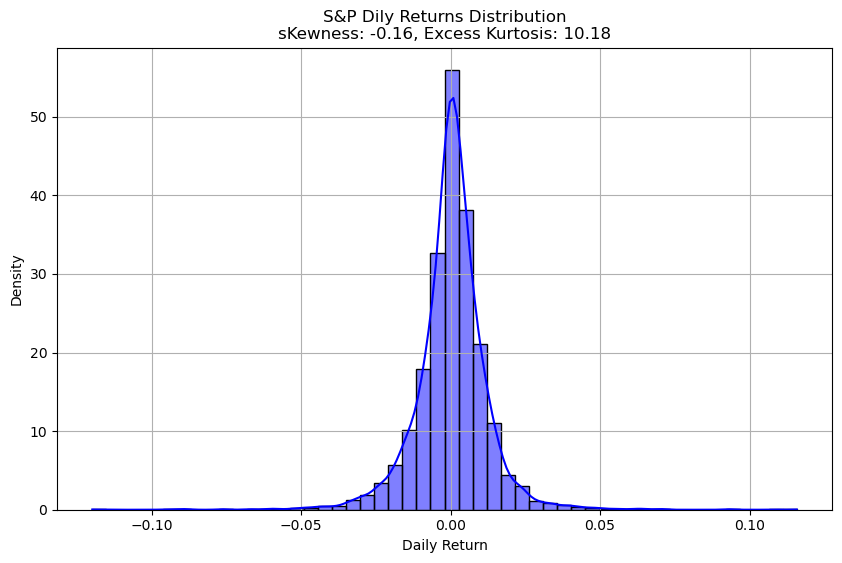

In [21]:
#plot histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True, color='blue', stat='density')
plt.title(f"S&P Dily Returns Distribution\nsKewness: {skewness:.2f}, Excess Kurtosis: {excess_kurtosis:.2f}")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()